### RGBD images

#### Redwood dataset

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
print("Read Redwood dataset")
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0])
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0])
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220301-data/SampleRedwoodRGBDImages.zip
[Open3D INFO] Downloaded to C:\Users\perso/open3d_data/download/SampleRedwoodRGBDImages/SampleRedwoodRGBDImages.zip
[Open3D INFO] Created directory C:\Users\perso/open3d_data/extract/SampleRedwoodRGBDImages.
[Open3D INFO] Extracting C:\Users\perso/open3d_data/download/SampleRedwoodRGBDImages/SampleRedwoodRGBDImages.zip.
[Open3D INFO] Extracted to C:\Users\perso/open3d_data/extract/SampleRedwoodRGBDImages.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


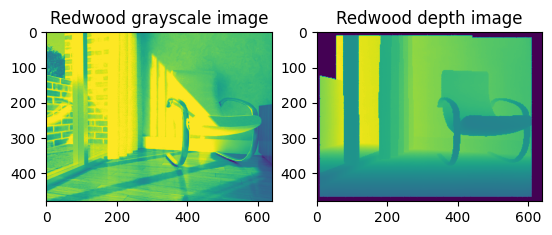

In [3]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
## 어디서 커널 충돌이 나는지 확인해야 함
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

: 